In [1]:
import PySO
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal


In [2]:
def Rastrigin_func(params):
    f = -(10*len(params)+np.sum(params**2-10*np.cos(2*np.pi*params),axis=1))
    return(f)

In [3]:
%matplotlib widget

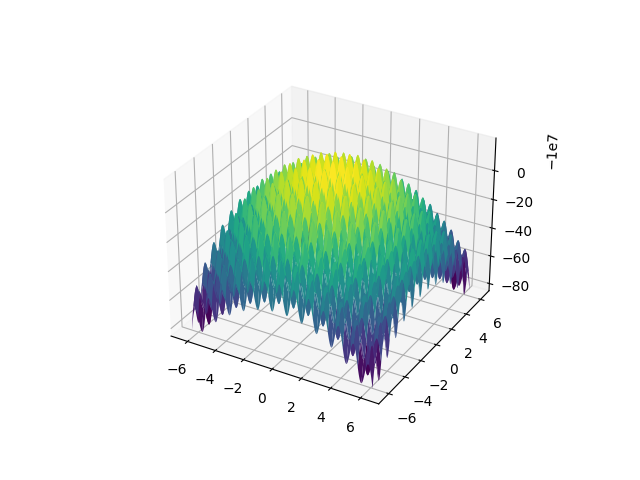

In [4]:
x = np.linspace(-2*np.pi,2*np.pi,1000)
y = np.linspace(-2*np.pi,2*np.pi,1000)

X, Y = np.meshgrid(x,y)

params = np.stack((X.flatten(),Y.flatten())).T
func_vals = Rastrigin_func(params).reshape(1000,1000)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, func_vals ,cmap='viridis', edgecolor='none')
# ax.plot_surface(X, Y, np.exp((func_vals-np.min(func_vals))/10),cmap='inferno', edgecolor='none')

plt.show()

In [5]:

import PySO

from albertos.custom_params import RedshiftedMass1RedshiftedMass2


class Tempered_PSO(PySO.Model):
    """
    A simple 2D Gaussian
    """
    names =['x','y']   
    
    bounds   = [[-2*np.pi,2*np.pi],
                [-2*np.pi,2*np.pi]]
    
    def __init__(self,segment_number):
    
        self.segment_number = segment_number

    def log_likelihood(self, params):
        parameters_array = np.array([params[key] for key in list(params.keys())])
        
        func_vals = -(10*len(parameters_array)+np.sum(parameters_array**2-10*np.cos(2*np.pi*parameters_array)))
        
        Semi_Co_Log_L = np.exp((func_vals)/self.segment_number)

        return(func_vals)
        

In [7]:
import os

NumParticles = 100

outdir = 'hierarchical_results/'

models = [Tempered_PSO(i) for i in range(20,0,-5)]

swarm_kwargs = {'Verbose':False, 'nPeriodicCheckpoint':1, 'Omega':0.6, 'PhiP':0.2, 'PhiG':0.2, 'Nthreads':5 ,'Tol':0.1}
Heirachial_Swarms = PySO.HierarchicalSwarmHandler(models,
                                                  1,
                                                  NumParticles,
                                                  Swarm_kwargs= swarm_kwargs,
                                                  Output = outdir, 
                                                  nPeriodicCheckpoint=1,
                                                  Verbose=True,
                                                  SaveEvolution=True, 
                                                  Minimum_exploration_iterations=100,
                                                  Initial_exploration_limit=150)

history_file = os.path.join(outdir, "EnsembleEvolutionHistory.dat")
if os.path.isfile(history_file): os.system('rm {}'.format(history_file))

Heirachial_Swarms.Run()




 Iteration: 1 

Swarm: 0, Max value: -2.055621126471813, at [1.05311191 0.04476204], with spread 77.4570001026195

 Iteration: 2 

Swarm: 0, Max value: -1.0527430868600938, at [-0.06700295 -0.02975106], with spread 78.5281609365496

 Iteration: 3 

Swarm: 0, Max value: -1.0527430868600938, at [-0.21005193 -0.10595974], with spread 77.90109571788123

 Iteration: 4 

Swarm: 0, Max value: -1.0527430868600938, at [-0.21005193 -0.10595974], with spread 52.913204578092426

 Iteration: 5 

Swarm: 0, Max value: -1.0527430868600938, at [-0.21005193 -0.10595974], with spread 51.83564452158952

 Iteration: 6 

Swarm: 0, Max value: -1.0527430868600938, at [-0.21005193 -0.10595974], with spread 43.47791906583195

 Iteration: 7 

Swarm: 0, Max value: -1.0527430868600938, at [-0.21005193 -0.10595974], with spread 42.29234874114908

 Iteration: 8 

Swarm: 0, Max value: -1.0527430868600938, at [-0.21005193 -0.10595974], with spread 47.06533939970165

 Iteration: 9 

Swarm: 0, Max value: -1.05274308686

/home/ADF/dxb792/Desktop/Balrog/PySO/PySO/HierarchicalSwarmHandler.py:177: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustering_parameter_positions = np.array([np.take(self.frozen_swarms[swarm_index].Points,self.clustering_indices,axis=1) for swarm_index
/home/ADF/dxb792/Desktop/Balrog/PySO/PySO/HierarchicalSwarmHandler.py:179: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustering_function_values = np.array([self.frozen_swarms[swarm_index].Values for swarm_index
/home/ADF/dxb792/Desktop/Balrog/PySO/PySO/HierarchicalSwarmHandler.py:191: Visible


 Iteration: 344 

Swarm: 0, Max value: -16.125656544003803, at [0.65350917 0.00162274], with spread 0.0
Swarm: 1, Max value: -5.658652156197412, at [-0.940296  -0.1487141], with spread 4.618527782440651e-14
Swarm: 2, Max value: -0.0, at [1.53767665e-09 3.38340644e-09], with spread 7.105427357601002e-15
Swarm: 3, Max value: -27.538617858813694, at [-0.80116424 -0.53411614], with spread 0.0
Swarm: 4, Max value: -16.301441036690314, at [-0.06433029 -0.66577911], with spread 4.263256414560601e-14
Swarm: 5, Max value: -28.513546480544647, at [-0.59107983  0.76314441], with spread 4.973799150320701e-14
Swarm: 6, Max value: -17.840716048122236, at [0.67940759 1.09917558], with spread 0.0
Swarm: 7, Max value: -13.080717356560855, at [-0.7797091   0.86078839], with spread 0.0
Swarm: 8, Max value: -29.260033577792882, at [ 0.54032122 -0.77086013], with spread 1.4210854715202004e-14
Swarm: 9, Max value: -32.35055684089933, at [0.64478918 0.65997286], with spread 9.947598300641403e-14
Swarm: 10, 

/home/ADF/dxb792/Desktop/Balrog/PySO/PySO/HierarchicalSwarmHandler.py:177: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustering_parameter_positions = np.array([np.take(self.frozen_swarms[swarm_index].Points,self.clustering_indices,axis=1) for swarm_index
/home/ADF/dxb792/Desktop/Balrog/PySO/PySO/HierarchicalSwarmHandler.py:179: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustering_function_values = np.array([self.frozen_swarms[swarm_index].Values for swarm_index
/home/ADF/dxb792/Desktop/Balrog/PySO/PySO/Clustering_Swarms.py:58: ConvergenceWarn


 Iteration: 497 

Swarm: 0, Max value: -18.42876278463556, at [-0.96359792 -0.37562363], with spread 7.8566541630338484
Swarm: 1, Max value: -10.990036476945082, at [0.04041557 0.2595604 ], with spread 1.4210854715202004e-14
Swarm: 2, Max value: -16.301441036690314, at [-0.06433029 -0.66577911], with spread 4.263256414560601e-14
Swarm: 3, Max value: -0.0, at [1.60443658e-09 3.45534623e-09], with spread 7.105427357601002e-15
Swarm: 4, Max value: -5.658652156197412, at [-0.940296  -0.1487141], with spread 4.618527782440651e-14
Swarm: 5, Max value: -13.080717356560855, at [-0.7797091   0.86078839], with spread 0.0
Swarm: 6, Max value: -17.840716048122236, at [0.67940759 1.09917558], with spread 14.411838500192982
Swarm: 7, Max value: -16.125656544003803, at [0.65350917 0.00162274], with spread 3.0818656558357063
Swarm: 8, Max value: -29.260033577792882, at [ 0.54032122 -0.77086013], with spread 1.4210854715202004e-14
Swarm: 9, Max value: -16.57061692848856, at [-0.71383802 -1.11650693], 

In [ ]:
import numpy as np 

In [2]:
np.exp(10000058.98033604410000018)

/tmp/ipykernel_305131/3257948749.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(10000058.98033604410000018)


inf